In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_excel("German_Credit.xlsx",sheet_name = "Sheet1")

In [6]:
data.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [8]:
data.isnull().values.any()

False

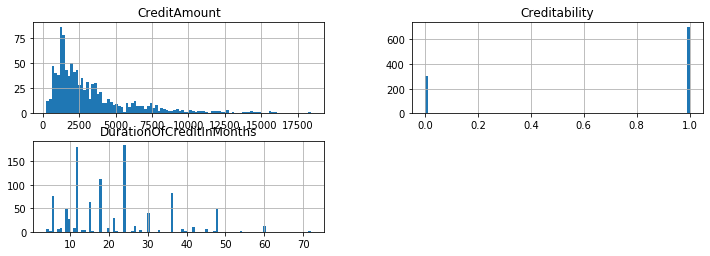

In [11]:
data.hist(bins= 100 , figsize = (12,30) , layout = (14,2));

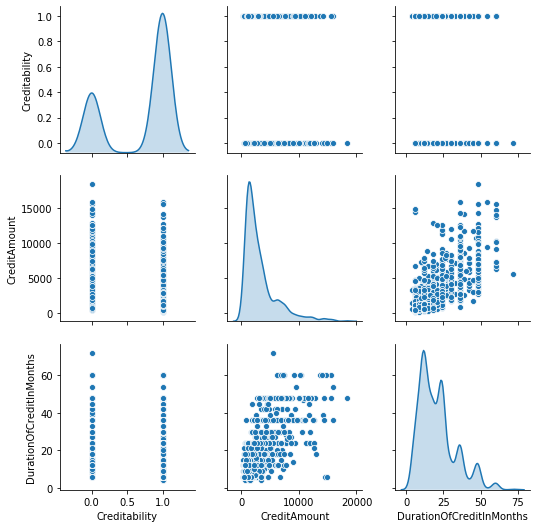

In [12]:
sns.pairplot(data,diag_kind = "kde")

In [13]:
data.corr()

,Creditability,CreditAmount,DurationOfCreditInMonths
Creditability,1.000000,-0.154740,-0.214927
CreditAmount,-0.154740,1.000000,0.624988
DurationOfCreditInMonths,-0.214927,0.624988,1.000000


In [16]:
def plot_corr(data , size = 7):
    corr = data.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)) , corr.columns)
    plt.yticks(range(len(corr.columns)) , corr.columns)

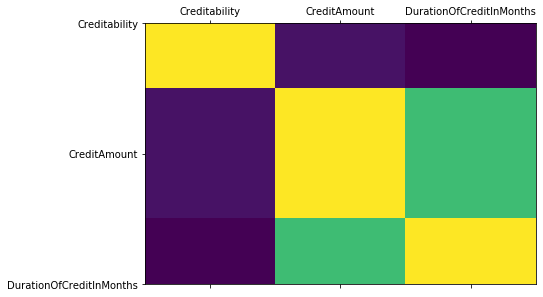

In [17]:
plot_corr(data)

In [28]:
n_true = len(data.loc[data['Creditability']== True] )

In [29]:
n_true

700

In [26]:
n_False = len(data.loc[data['Creditability']== False] )

In [27]:
n_False

300

In [30]:
data.shape

(1000, 3)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_feature = data.drop('Creditability',axis=1)

In [33]:
y_target = data['Creditability']

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x_feature , y_target , test_size = 0.30 , random_state = 1)

In [36]:
x_train.isnull().sum()

CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

In [37]:
x_train.head()

,CreditAmount,DurationOfCreditInMonths
731,6527,60
716,7476,48
640,2348,36
804,900,12
737,1149,18


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver = "liblinear")

In [42]:
model.fit(x_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_predict = model.predict(x_test)

In [44]:
from sklearn import metrics

In [46]:
cm = metrics.confusion_matrix(y_test , y_predict)

In [47]:
cm

array([[  9,  82],
       [ 11, 198]], dtype=int64)

In [48]:
print("Accuracy score : " , metrics.accuracy_score(y_test ,y_predict))

Accuracy score :  0.69
